From tutorial: https://pytorch.org/tutorials/beginner/fgsm_tutorial.html

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from methods import *
from utils import *

# Choice of Model to Attack
- LeNet5: MNIST
- Basic CNN: Fashion MNIST
- ResNet20: CIFAR-10
### Run **ONE** of the following 3 cells

In [2]:
from models.LeNet import *
target_mdl = LeNet("models/lenet_mnist_model.pth")
model = target_mdl.model
device = target_mdl.device
test_loader = target_mdl.testloader
mdl_name='MNIST'

In [3]:
from models.simple_FashionMNIST import *
target_mdl = simple_FashionMNIST("models/simple_FashionMNIST.pth")
model = target_mdl.model
device = target_mdl.device
test_loader = target_mdl.testloader
mdl_name = 'FMNIST'

Running on cpu.
Model weights loaded successfully


In [4]:
from models.resNet import ResNet20
target_mdl = ResNet20()
model = target_mdl.model
device = target_mdl.device
test_loader = target_mdl.testloader
mdl_name = 'ResNet'

Using cache found in C:\Users\JIC/.cache\torch\hub\chenyaofo_pytorch-cifar-models_master


Files already downloaded and verified


In [5]:
hist_dfs = []
final_hist_dfs = []
hist = None

debug = True
targeted = True
epsilon = 0.005
ex_savers = []
# Run test for each epsilon
algs = ['fw', 'fw_away', 'fw_pair']
#algs = ['fw_away']
for alg in algs:
    ex_saver = example_saver()
    acc, ex, hist = test(target_mdl, device,
                         epsilon = epsilon, 
                         num_fw_iter = 20,
                         method = alg, 
                         early_stopping = 'gap_FW', 
                         fw_stepsize_rule = 'decay', 
                         gap_FW_tol = 1E-1,
                         targeted = targeted, 
                         num_test = 100, 
                         ex_saver=ex_saver,
                         norm_p=-1, # -1 for infnty norm
                         seed=11)
    ex_savers.append(ex_saver)
    hist_dfs.append(hist)
    final_hist = hist.groupby('example_idx').tail(1)
    final_hist_dfs.append(final_hist) # hist with just the rows of last FW iters
final_hist_dfs[-1]

  1%|          | 109/10000 [00:24<36:54,  4.47it/s]


Epsilon: 0.005	Correct Classifications (Failed Attacks) = 34 / 100 = 0.34


  1%|          | 109/10000 [00:27<41:17,  3.99it/s] 


Epsilon: 0.005	Correct Classifications (Failed Attacks) = 37 / 100 = 0.37


  1%|          | 109/10000 [00:31<47:13,  3.49it/s] 

Epsilon: 0.005	Correct Classifications (Failed Attacks) = 35 / 100 = 0.35


,example_idx,FW_iter,gap_FW,success,first_success,target,pred,stop_cond,adv_target,gap_AS,A_t,l_inf,mdlLoss,targeted_success
19,0,20,0.144464,True,False,9,8,max_iter,8,0.072357,"[0.04711779448621553, 0.16666666666666663, 0.1...",0.005,0.847962,True
39,1,20,0.140389,False,False,6,6,max_iter,8,0.079774,"[0.16666666666666663, 0.16666666666666666, 0.0...",0.005,6.236699,False
59,2,20,0.314945,False,False,0,0,max_iter,8,0.126811,"[0.02521008403361344, 0.18181818181818182, 0.1...",0.005,3.380095,False
65,3,6,0.053495,True,False,1,9,gap,9,0.023805,"[0.04761904761904767, 0.09999999999999998, 0.4...",0.005,0.080469,True
69,4,4,0.049490,True,False,7,3,gap,3,0.021332,"[0.16666666666666663, 0.5, 0.33333333333333337]",0.005,0.013404,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,95,3,0.085076,True,False,6,3,gap,3,0.016952,"[0.33333333333333337, 0.16666666666666663, 0.5]",0.005,0.024956,True
1351,96,20,0.330045,True,False,8,7,max_iter,7,0.108587,"[0.08521303258145363, 0.032352941176470584, 0....",0.005,0.808047,True
1371,97,20,0.312035,False,False,1,1,max_iter,5,0.118830,"[0.18181818181818182, 0.06666666666666665, 0.0...",0.005,6.109452,False
1391,98,20,0.270890,False,False,7,7,max_iter,0,0.139163,"[0.10389610389610388, 0.08333333333333337, 0.1...",0.005,5.143276,False


In [19]:
away_hist

,example_idx,FW_iter,gap_FW,success,first_success,target,pred,stop_cond,adv_target,gap_AS,...,v_t_idx,awayCosts,max_step,L_inf_step,L_inf_alpha,step_alpha_diffFactor,l_inf,mdlLoss,targeted_success,drop_stepAS
0,0,1,2.548006,False,False,9,9,None,8,0.000000e+00,...,0,[-1.0902012586593628],1.0,0.005000,0.005,0.000000,0.005000,15.079809,False,NaN
1,0,2,1.322431,False,False,9,9,None,8,-1.590553e-04,...,0,[-0.8095912933349609],1.0,0.005000,0.005,0.344390,0.005000,6.906051,False,NaN
2,0,3,1.234817,False,False,9,9,None,8,2.009871e-01,...,1,"[-1.6669585704803467, -1.0619616508483887]",1.0,0.005000,0.005,0.118029,0.005000,5.982160,False,NaN
3,0,4,0.895891,False,False,9,9,None,8,3.594435e-01,...,0,"[-0.7303400039672852, -1.2072572708129883, -1....",1.0,0.005000,0.005,0.069652,0.005000,4.641403,False,NaN
4,0,5,0.724661,False,False,9,9,None,8,4.006134e-01,...,1,"[-0.7386293411254883, -0.7348785400390625, -1....",1.0,0.005000,0.005,0.386594,0.005000,3.766914,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,98,20,0.211508,False,False,7,7,max_iter,0,1.631733e-01,...,0,"[-0.9174196720123291, -0.9269206523895264, -0....",1.0,0.005195,0.005,0.169653,0.005195,4.971390,False,NaN
1329,99,1,5.213001,True,True,6,5,None,5,0.000000e+00,...,0,[-1.4774277210235596],1.0,0.005000,0.005,0.000000,0.005000,6.340200,True,NaN
1330,99,2,0.643244,True,False,6,5,None,5,2.496031e-08,...,0,[0.13425719738006592],1.0,0.005000,0.005,0.011400,0.005000,0.171350,True,NaN
1331,99,3,0.141748,True,False,6,5,None,5,3.734638e-02,...,1,"[-0.12697580456733704, -0.014936630614101887]",1.0,0.005000,0.005,0.010613,0.005000,0.029185,True,NaN


In [21]:
away_hist = hist_dfs[1]
away_hist[away_hist['step_type'] == 'AS'][['max_step','stepsize','drop_stepAS']]

,max_step,stepsize,drop_stepAS
5,7.142857e-02,7.142857e-02,AS
6,1.666667e-01,1.666667e-01,AS
10,1.458333e-01,1.458333e-01,AS
14,1.392405e-01,1.250000e-01,NaN
17,9.900990e-03,9.900990e-03,AS
...,...,...,...
1300,4.761905e-02,4.761905e-02,NaN
1302,5.947623e-18,5.947623e-18,AS
1316,3.703704e-02,3.703704e-02,AS
1318,6.299213e-02,6.299213e-02,AS


fw
	Attack Success Rate: 0.63
	Avg iters: 13.26
fw_away
	Attack Success Rate: 0.62
	Avg iters: 13.33
	step types: FW 1109, AS 224. 16.8% Away Steps.
fw_pair
	Attack Success Rate: 0.62
	Avg iters: 13.96


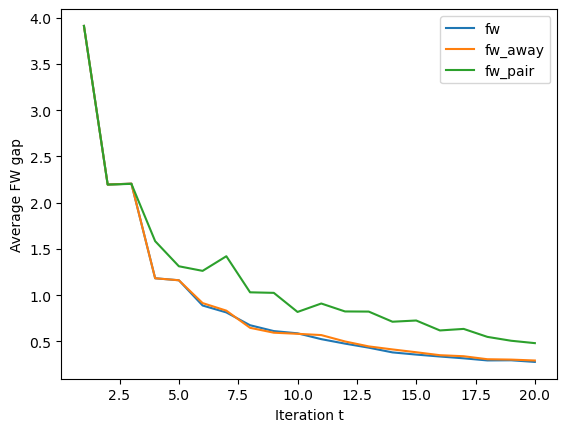

In [6]:

for i, final_hist in enumerate(final_hist_dfs):
    alg = algs[i]
    print(alg)
    print(f"\tAttack Success Rate: {final_hist['targeted_success' if targeted else 'success'].mean()}")
    print(f"\tAvg iters: {final_hist['FW_iter'].mean()}")
    if alg == 'fw_away':
        st = hist_dfs[i].groupby('step_type').size().to_dict()
        if len(st.keys()) > 1:
            print(f"\tstep types: FW {st['FW']}, AS {st['AS']}. {100 * st['AS'] / (st['FW'] + st['AS']):.1f}% Away Steps.")
        else:
            print("\t100% FW steps")
    plt.plot(hist_dfs[i].groupby('FW_iter')['gap_FW'].mean(), label=algs[i])
plt.xlabel("Iteration t")
plt.ylabel("Average FW gap")
plt.legend()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


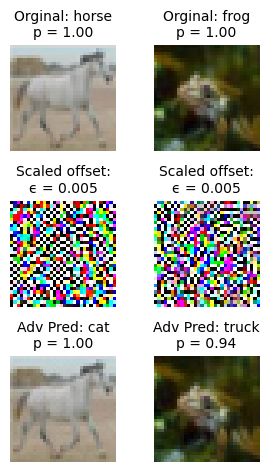

In [23]:
ex_saver = ex_savers[1]
n_col = 2
offset = 2
n_col = min(n_col, len(ex_saver.adv_pred))
cmap = None if mdl_name == 'ResNet' else 'gray'

fig, axs = plt.subplots(3,n_col)
for i in range(n_col):
    ex_idx = i + offset
    true = ex_saver.adv_true[ex_idx]
    pred = ex_saver.adv_pred[ex_idx]
    x0 = ex_saver.adv_x0[ex_idx]
    atk = (ex_saver.adv_atk[ex_idx]+epsilon)/(2*epsilon)
    atk = np.clip(atk,0,1)
    xt = ex_saver.adv_xt[ex_idx]
    prob_true = ex_saver.adv_true_init_prob[ex_idx]
    prob_adv = ex_saver.adv_final_prob[ex_idx]
    axs[0, i].imshow(x0, cmap = cmap)
    axs[0, i].axis('off')
    axs[0, i].set_title(f"Orginal: {target_mdl.classes[true]}\np = {prob_true:.2f}", fontsize=10)
    axs[1, i].imshow(atk, cmap = cmap)
    axs[1, i].axis('off')
    axs[1, i].set_title(f"Scaled offset:\nϵ = {epsilon}", fontsize=10)
    axs[2, i].imshow(xt, cmap = cmap)
    axs[2, i].axis('off')
    axs[2, i].set_title(f"Adv Pred: {target_mdl.classes[pred]}\np = {prob_adv:.2f}", fontsize=10)
plt.tight_layout(pad=1.0, w_pad=-15, h_pad=1.0)
plt.show()

Epsilion choice analysis

In [11]:
with open('Report/Results/eps_compare.tsv','a') as f:
    header = ['eps', 'alg', 'SR', 'DS', 'targeted']
    targeted = False
    #f.write('\t'.join(header)+'\n')
    for i, df in enumerate(final_hist_dfs):
        f.write('\t'.join([str(epsilons[i]), alg, str(df['success'].mean()), mdl_name, str(targeted)])+'\n')

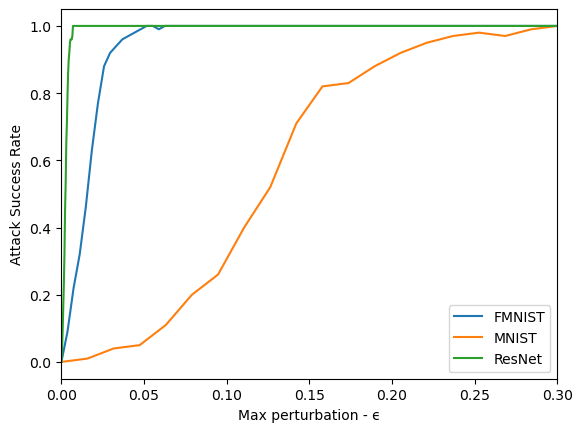

In [35]:
eps_df = pd.read_csv('Report/Results/eps_compare.tsv', sep='\t')
for ds in eps_df['DS'].unique():
    df = eps_df[eps_df['DS'] == ds]
    #df = df[df['eps'] <= 0.3]
    plt.plot(df['eps'], df['SR'], label=ds)
plt.xlim((0,0.3))
plt.legend()
plt.xlabel('Max perturbation - ϵ')
plt.ylabel('Attack Success Rate')
plt.savefig('Report/plots/eps_choice.png')
plt.show()


In [8]:
final_hist.groupby('stop_cond').size()

stop_cond
gap          1
max_iter    24
dtype: int64

In [19]:
final_hist.groupby('success')['gap_FW'].mean()

success
False    0.414841
True     0.106524
Name: gap_FW, dtype: float64

Mean FW iterations: 12.93


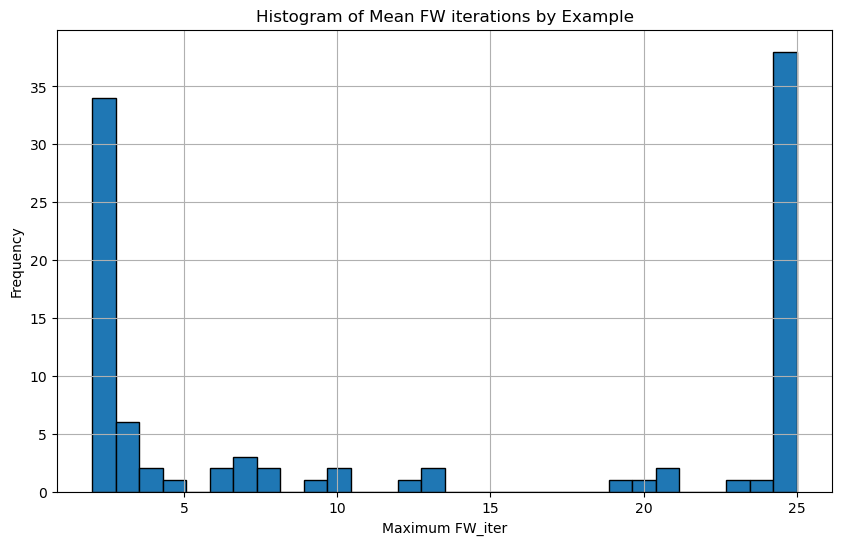

In [12]:
num_iters = hist_dfs[2].groupby('example_idx')['FW_iter'].max()
print(f"Mean FW iterations: {num_iters.mean()}")
plt.figure(figsize=(10, 6))
num_iters.plot(kind='hist', bins=30, edgecolor='black')
plt.title('Histogram of Mean FW iterations by Example')
plt.xlabel('Maximum FW_iter')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [40]:
final_hist['success'].mean()

0.89

In [41]:
final_hist['FW_iter'].mean()

8.42

In [31]:
# accuracy
hist.groupby('example_idx')['first_success'].sum().mean()

0.62

In [28]:
# average number of iterations for success
hist[hist['first_success']]['FW_iter'].mean()

1.0258064516129033

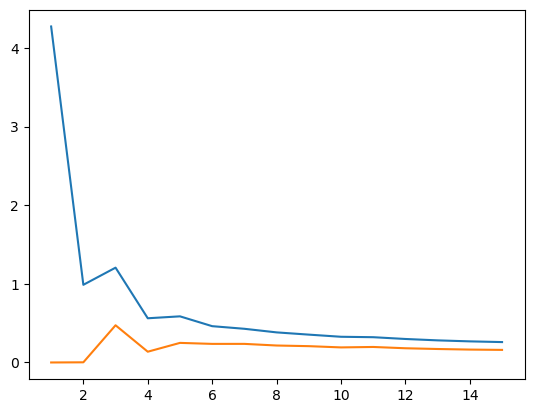

In [7]:
plt.plot(hist.groupby('FW_iter')['gap_FW'].mean())
plt.plot(hist.groupby('FW_iter')['gap_AS'].mean())

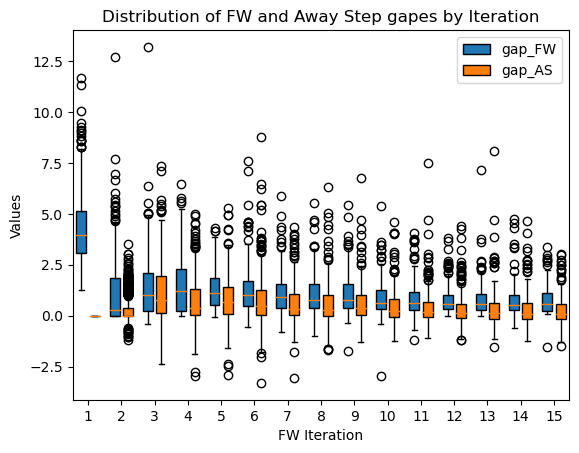

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data generation for demonstration purposes

# Extracting unique iteration groups
groups = hist['FW_iter'].unique()

# Creating lists to hold data for each group
data_FW = []
data_AS = []

for group in groups:
    data_FW.append(hist[hist['FW_iter'] == group]['gap_FW'].values)
    data_AS.append(hist[hist['FW_iter'] == group]['gap_AS'].values)

# Plotting
fig, ax = plt.subplots()

# Positions of the boxplots
positions_FW = np.arange(1, len(groups) + 1) * 2.0 - 0.4
positions_AS = np.arange(1, len(groups) + 1) * 2.0 + 0.4

# Creating the boxplots
box_FW = ax.boxplot(data_FW, positions=positions_FW, widths=0.6, patch_artist=True, boxprops=dict(facecolor="C0"))
box_AS = ax.boxplot(data_AS, positions=positions_AS, widths=0.6, patch_artist=True, boxprops=dict(facecolor="C1"))

# Customizing the plot
ax.set_xlabel('FW Iteration')
ax.set_ylabel('Values')
ax.set_title('Distribution of FW and Away Step gapes by Iteration')
ax.set_xticks(np.arange(1, len(groups) + 1) * 2.0)
ax.set_xticklabels([i for i in groups])

# Adding legend
ax.legend([box_FW["boxes"][0], box_AS["boxes"][0]], ['gap_FW', 'gap_AS'], loc='upper right')

# Display the plot
plt.show()


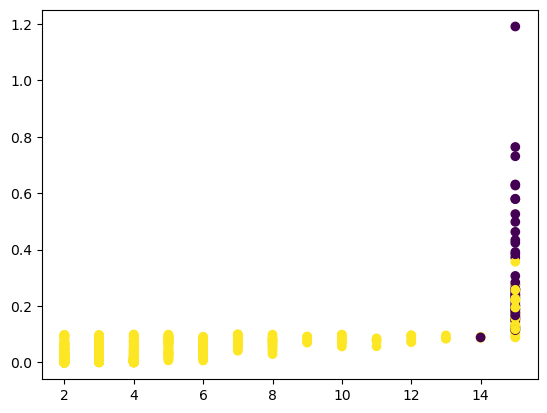

In [15]:
plt.scatter(final_hist['FW_iter'],final_hist['gap_FW'], c=final_hist['success'])

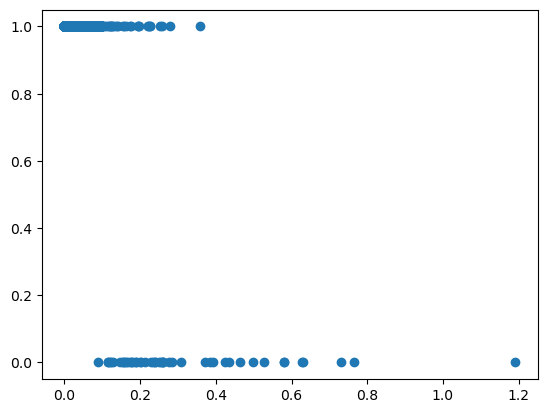

In [16]:
plt.scatter(final_hist['gap_FW'], final_hist['success'])

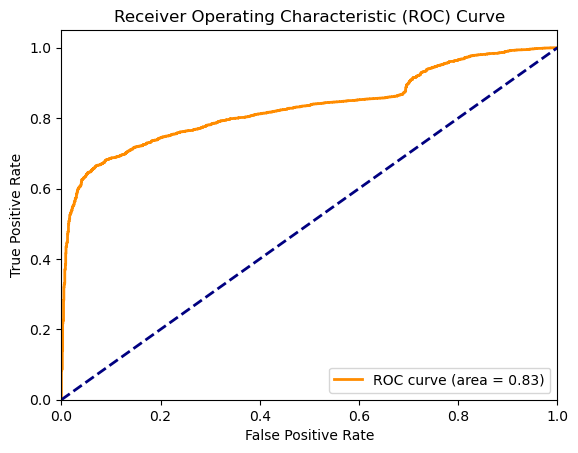

In [ ]:
from sklearn.metrics import roc_curve, auc

# Sample data: true binary labels and predicted probabilities
y_true = hist['success']
y_scores = 1- hist['gap_trans']

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

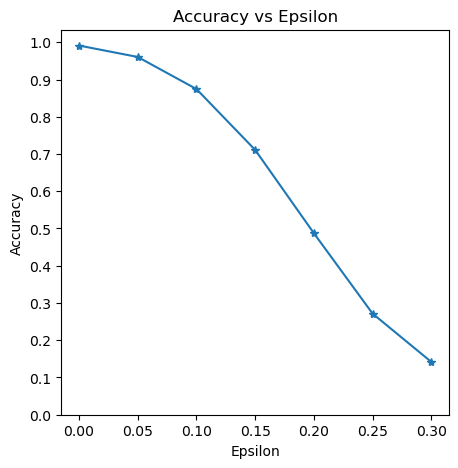

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

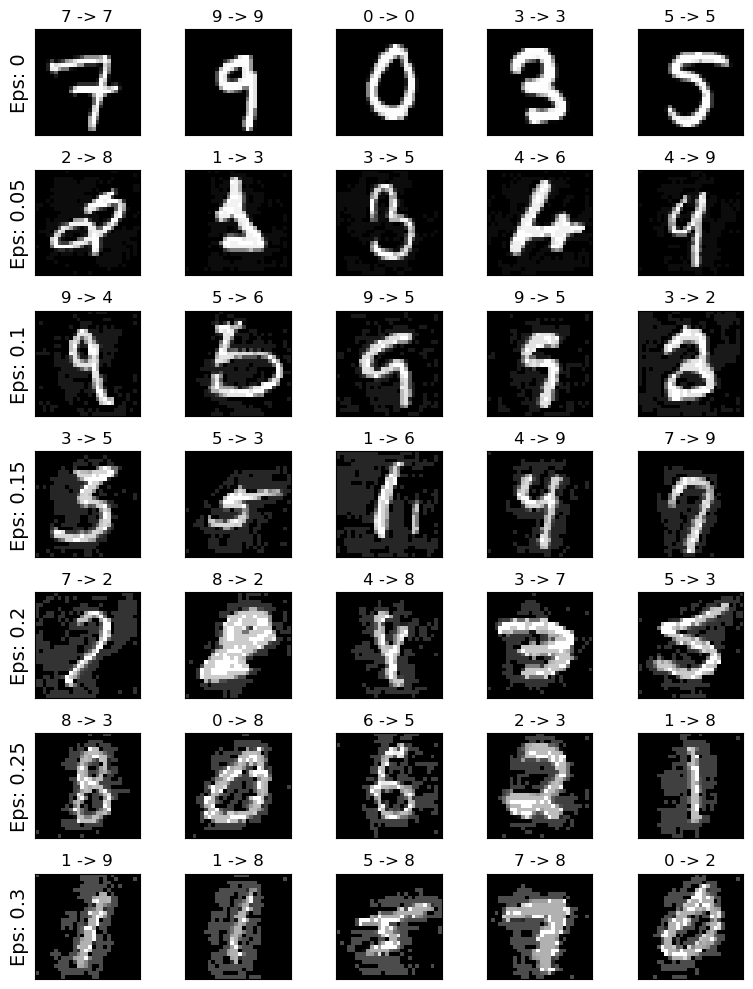

In [ ]:
# Plot several examples of adversarial samples at each epsilon
cnt = 0
plt.figure(figsize=(8,10))
for i in range(len(epsilons)):
    for j in range(len(examples[i])):
        cnt += 1
        plt.subplot(len(epsilons),len(examples[0]),cnt)
        plt.xticks([], [])
        plt.yticks([], [])
        if j == 0:
            plt.ylabel(f"Eps: {epsilons[i]}", fontsize=14)
        orig,adv,ex = examples[i][j]
        plt.title(f"{orig} -> {adv}")
        plt.imshow(ex, cmap="gray")
plt.tight_layout()
plt.show()